# **Intro To Machine Learning - Assignment 1**

**Elisa Klunder (s5190940)**

**Aksel Joonas Reedi (s4790820)**

**Mihkel Mariusz Jezierski (s4787730)**

**Part I - Feature Types**
*   A random number in range [0, 1] \\
Answer: continuous since there are infinite (uncountable) amount of real

*   Number of bikes stores in Groningen. \\
Answer: discrete, because the number of bikes stores in Groningen can only be an integer
number.

*   Handedness. \\
Answer: categorical, since the handedness type (left, right) is discrete and does not have ordered relevance (like continuous and discrete types have).

*   Current types of Machine Learning methods. \\
Answer: categorical, since there is no order of importance can be established between the types of Machine Learning.

*   Duration of your trip from home to campus Zernike. \\
Answer: continuous, since the duration of the trip can take on any numerical value.




**Part II - Classifiers vs Regressors**
1. We evaluated the given features based on the ”Not useful features” criteria provided in the lecture 2:
  1. Features that are linearly correlated with each other.
  2. Features that do not change over the whole dataset (constant).
  3. Features with many missing or unclear values.
  4. Features that do not predict the target value of interest.
  5. Random features.

  Since first, second, and third criteria can be evaluated only based on concrete data set, we analysed each proposed feature based only on fourth and fifth criteria ("Features that do not predict the target values of interest, aka features that are irrelevant to the expected prediction" and "random features"). We based ourselves on our common-sense knowledge of how inherently relevant these factors can be in a person’s study capabilities. Aditionally, we do not have factual outlook on what habits (or features) contribute to the learning success.

  * ”Number of coffee units drank per day” would not be useful, since coffee consumption depends on individual taste and necessities
  * ”Number of study hours” would be useful, since studying more usually leads to a better understanding of the material
  * ”Country where a student obtained their high school diploma” wouldn’t be useful, even though certain countries’ educational systems are said to be better than others, since considering such a large-scale feature when trying to predict individual outcomes might introduce heavy biases that don’t reflect on a single student
  * ”Age” wouldn’t be useful, since if a person is attending university they possess the pre-vious education needed to get into university, independently from their age
  * ”Number of times student attended lectures” would be useful, because most of the times, students that attend lectures tend to achieve higher grades
  
2. Predicting the success rate of students passing a course is a classification task, since the output
variable (pass/not pass) is discrete instead of continuous

**Part III - Feature Transformations and Linear Separability**


First we will load the libraries necessary to perform our task.

In [4]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.datasets import load_wine

After loading the libraries we will load the dataset. To be able to utilse it, we will transform the dataset from a "bunch" object to a dataframe.

In [5]:
# Load dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [6]:
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [7]:
# Print the dataset
print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

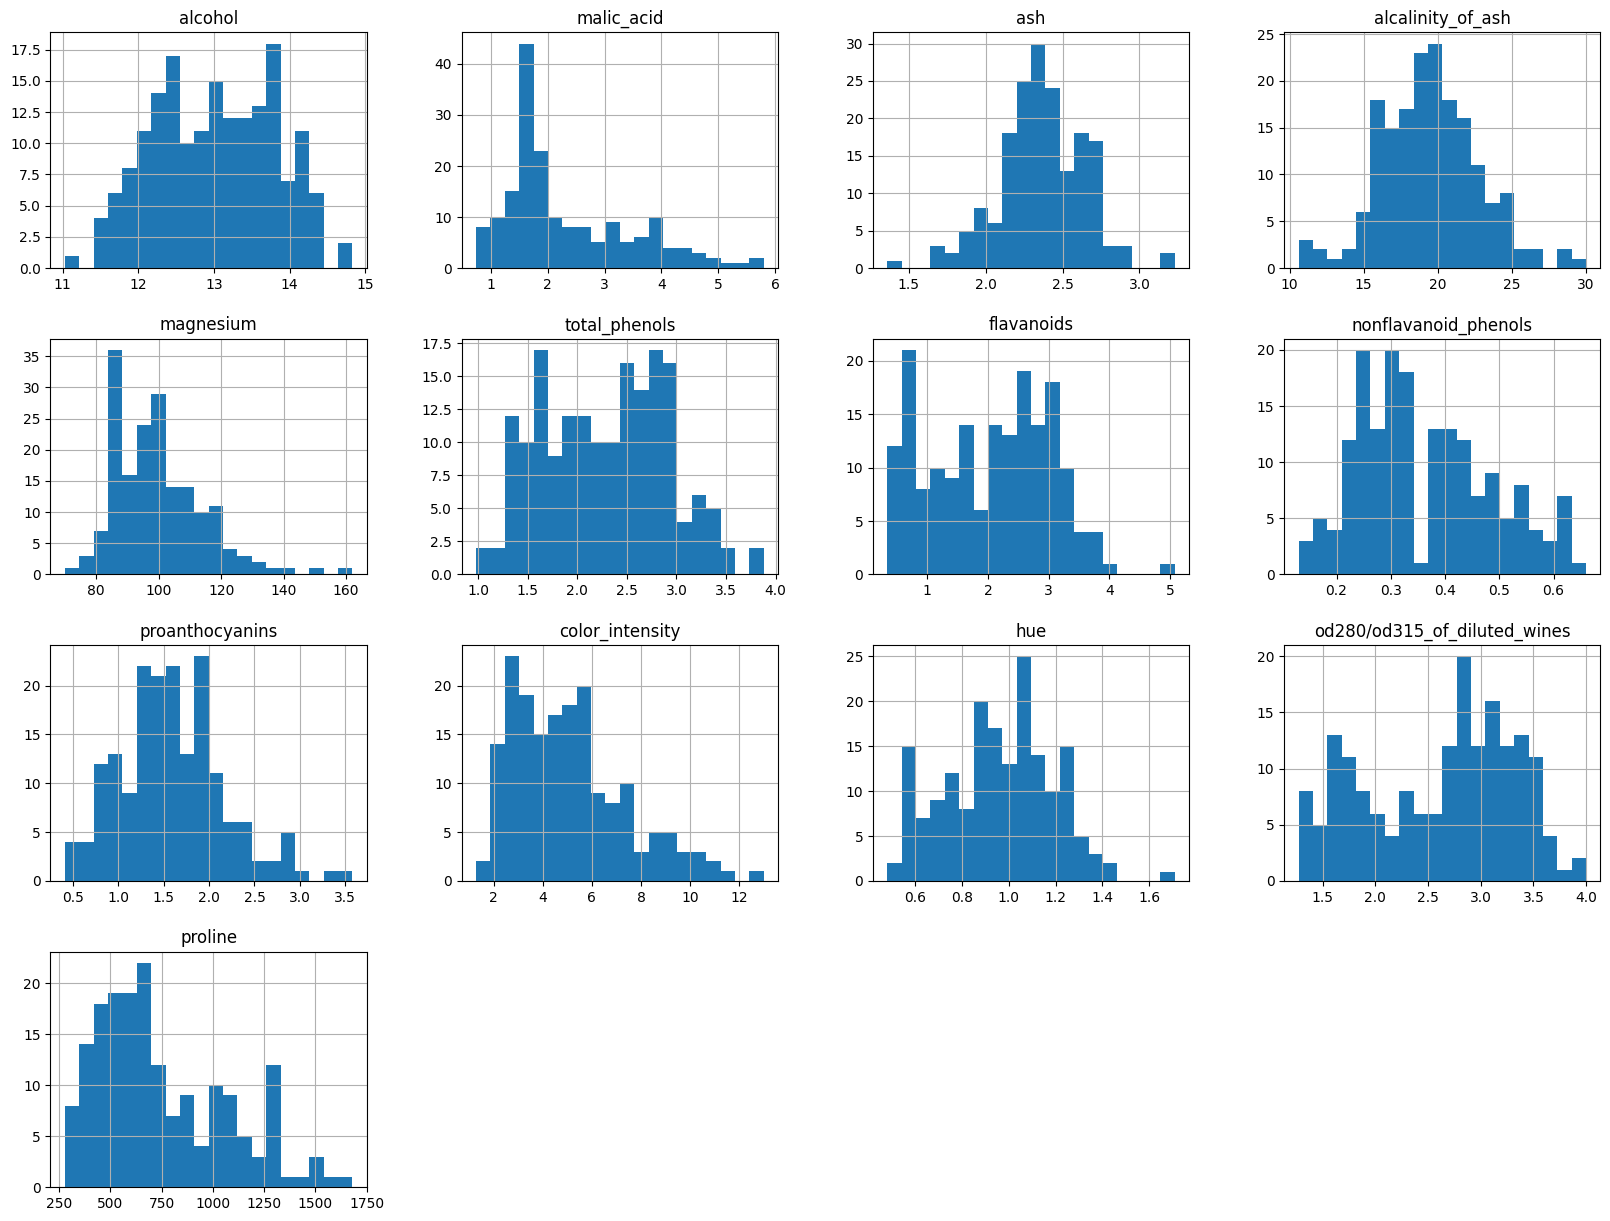

In [8]:
# Visualize the dataset
wine_df.hist(bins=20, figsize=(20,15))
plt.show()

We then check if there are any missing values we have to take care of, but there are none.

In [9]:
# Check for missing values
missing_values = wine_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


We construct a correlation matrix to visualize which features are highly correlated to each other.
To construct a robust model we will want to select features that don't have a high correlation, since those don't add a lot of information useful to train the model.

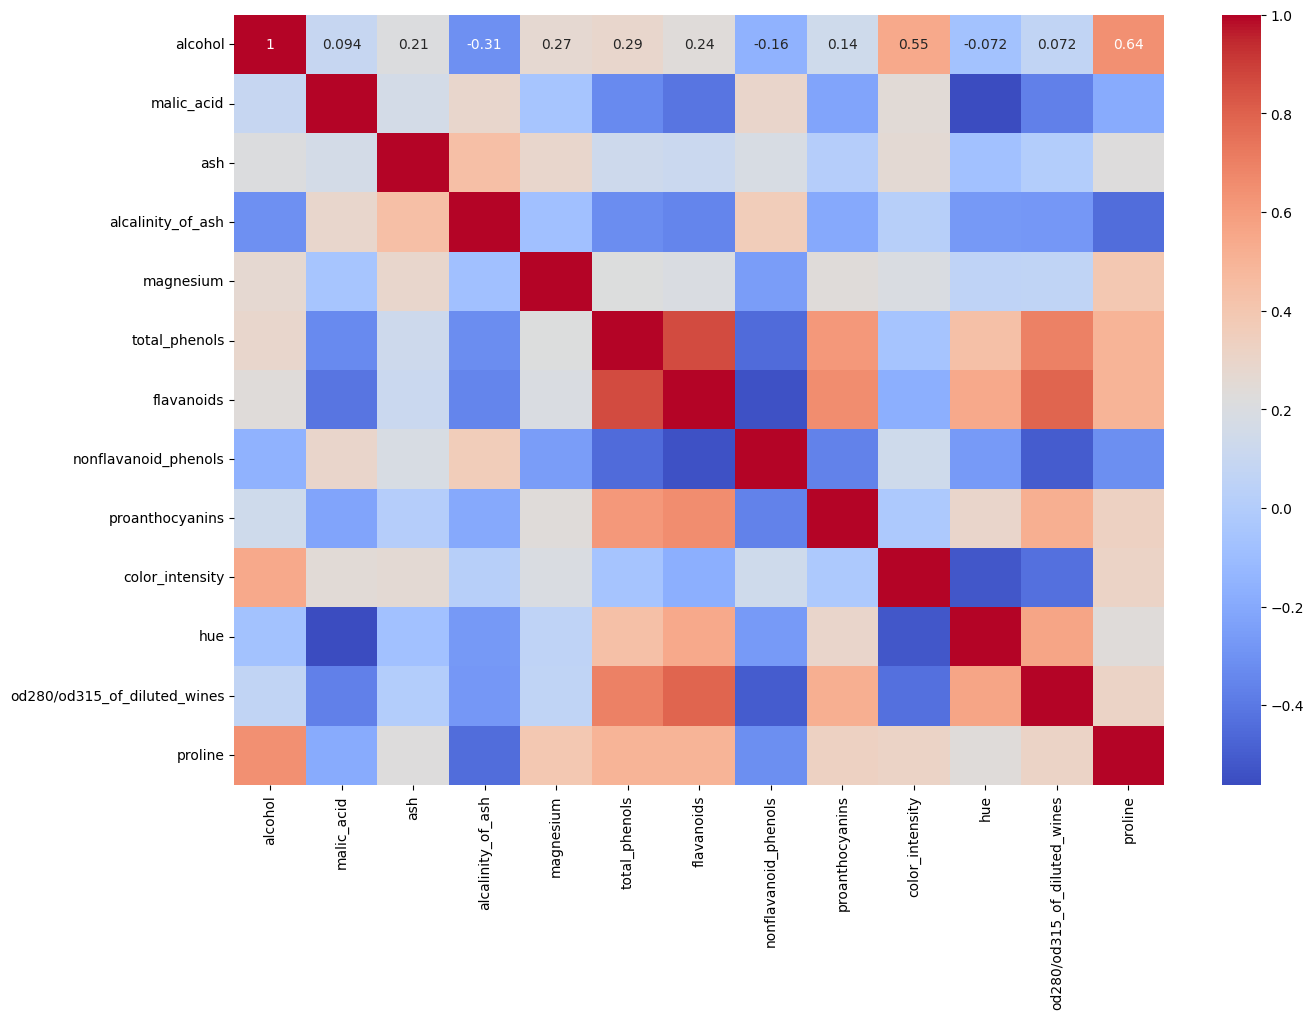

In [10]:
#The correlation matrix for the whole data set
correlation_matrix = wine_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

We selected four features that had low correlation scores to each other. We can now construct the correlation matrix again for our four selected features.

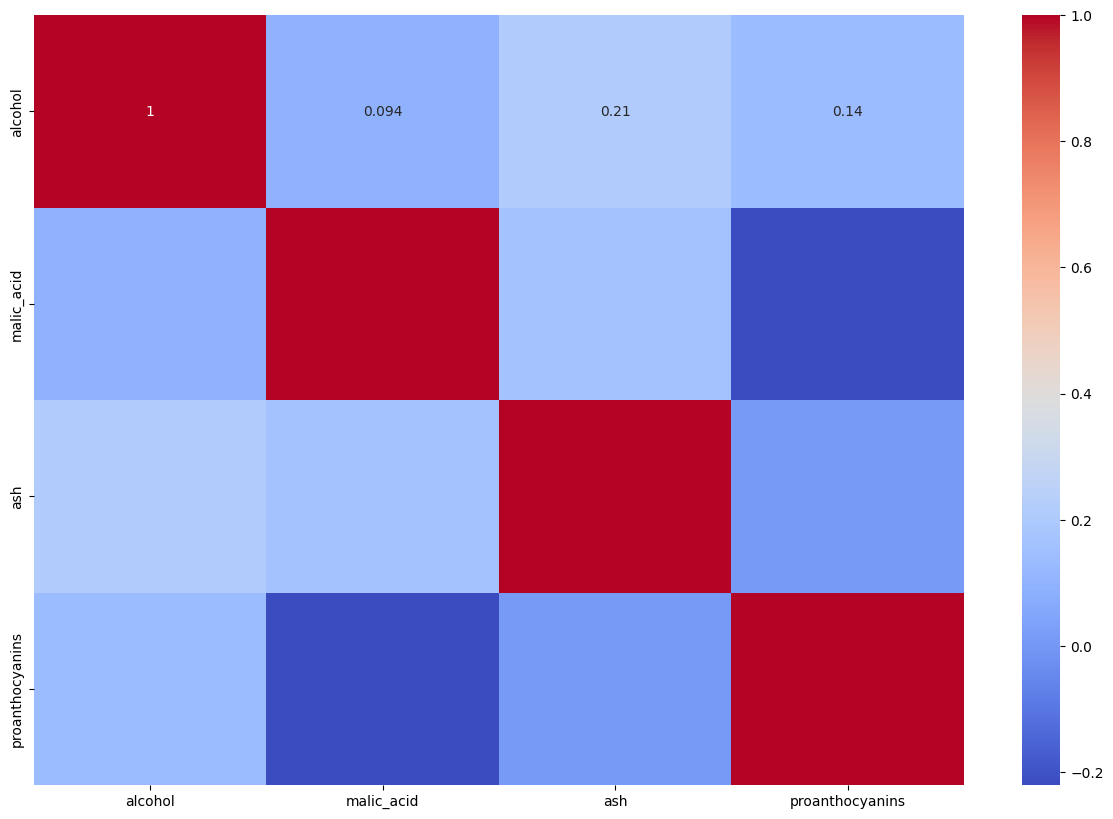

In [11]:
# Correlation matrix for the features we selected
X = wine_df
y = wine.target
selected_features = ['alcohol', 'malic_acid', 'ash', 'proanthocyanins']
X = wine_df[selected_features]

correlation_matrix = X.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


After that we split the data into test (20%) and training (80%) sets and set a random split seed to get reproducable results. If you set the random_state = None then you can see how the accuracy of the model fluctuates a bit. This is because the data is split randomly

In [12]:
# Splitting and scaling the data
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    X, y, test_size=0.20, random_state = 42)

To scale the data we used MinMaxScaler because our features are not normally distributed and to put all the data features in the range [0, 1]. Additionally MinMaxScaler preserves the relative relationships between data points.

In [13]:
# Scaling the train data
scaler = StandardScaler()
wine_X_train_scaled = scaler.fit_transform(wine_X_train)

We then train the model on the scaled train data using LogisticRegression.

In [14]:
#Training the logistic regression model
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(wine_X_train_scaled, wine_y_train)

LogisticRegression()

Only after having trined the model we start working with the test data. In this case we could have scaled the test data before, but it's good practice to only access the test data after having trained the model.

We can now scale the test data and use it to get predictions for our targets.

In [15]:
# Scaling the test data
wine_X_test_scaled = scaler.transform(wine_X_test)

In [16]:
# Predict on the test set
wine_y_pred = regression.predict(wine_X_test_scaled)

Finally we can evaluate the model by comparing the predictions obtained with the model with the actual targets in the test data.

In [17]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(wine_y_test, wine_y_pred)
confusion_mat = confusion_matrix(wine_y_test, wine_y_pred)
class_report = classification_report(wine_y_test, wine_y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

Accuracy: 0.9166666666666666
Confusion Matrix:
 [[12  0  2]
 [ 0 13  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.93      0.96        14
           2       0.73      1.00      0.84         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



We obtain an accuracy score of 92%. This means that our model correctly classifies the data points 92% of the time. This also means that the features we selected are linearly searable to a good degree, even though not perfectly.



Now we will repeat the entire process described above, but instead of selecting four features we will train the model on the entire set of features.

In [19]:
''' Training the model with all features '''

#Get the data
X_af = wine_df      # af stands for "all features"
y_af = wine.target

# Split the data
wine_X_af_train, wine_X_af_test, wine_y_af_train, wine_y_af_test = train_test_split(
    X_af, y_af, test_size=0.20, random_state = 42) #If you change/remove the split the accuracy fluctuates between 0.94 and 1

# Scale the data
scaler = StandardScaler()
wine_X_af_train_scaled = scaler.fit_transform(wine_X_af_train)
wine_X_af_test_scaled = scaler.transform(wine_X_af_test)

#Training the linear regression model

from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(wine_X_af_train_scaled, wine_y_af_train)

# Predict on the test set
wine_y_af_pred = regression.predict(wine_X_af_test_scaled)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(wine_y_af_test, wine_y_af_pred)
confusion_mat = confusion_matrix(wine_y_af_test, wine_y_af_pred)
class_report = classification_report(wine_y_af_test, wine_y_af_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



With this model we get an accuracy rate of 100%. This is clearly better than the 92% obtained by selecting four features. This means that, in this case, considering more features allows for more precise classification of the data points.

Finally, we try to apply some mathematical functions to the features. By applying some transformations to features, we hope to map these features to a normal distribution, with the aim of increasing the performance of our models.
We will try to apply the exponential transformation and the logarithmic transformation to our four selected features, and see if this increases the accuracy of our model.

In [ ]:
''' Applying exponential function to our selected features '''

# Transforming the data
wine_X_train_exp = np.exp(wine_X_train)
wine_X_test_exp = np.exp(wine_X_test)

# Scaling the data
scaler = MinMaxScaler()
wine_X_train_exp_scaled = scaler.fit_transform(wine_X_train_exp)
wine_X_test_exp_scaled = scaler.transform(wine_X_test_exp)

#Training the linear regression model
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(wine_X_train_exp_scaled, wine_y_train)

# Predict on the test set
wine_y_pred = regression.predict(wine_X_test_exp_scaled)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(wine_y_test, wine_y_pred)
confusion_mat = confusion_matrix(wine_y_test, wine_y_pred)
class_report = classification_report(wine_y_test, wine_y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)



Accuracy: 0.8055555555555556
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 2  4  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.74      1.00      0.85        14
           2       1.00      0.25      0.40         8

    accuracy                           0.81        36
   macro avg       0.87      0.73      0.72        36
weighted avg       0.85      0.81      0.77        36



In [ ]:
''' Applying logarithmic function to our selected features '''

# Transforming the data
wine_X_train_log = np.log(wine_X_train)
wine_X_test_log = np.log(wine_X_test)

# Scaling the data
scaler = MinMaxScaler()
wine_X_train_log_scaled = scaler.fit_transform(wine_X_train_log)
wine_X_test_log_scaled = scaler.transform(wine_X_test_log)

#Training the linear regression model
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(wine_X_train_log_scaled, wine_y_train)

# Predict on the test set
wine_y_pred = regression.predict(wine_X_test_log_scaled)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(wine_y_test, wine_y_pred)
confusion_mat = confusion_matrix(wine_y_test, wine_y_pred)
class_report = classification_report(wine_y_test, wine_y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

Accuracy: 0.9166666666666666
Confusion Matrix:
 [[12  0  2]
 [ 0 13  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.93      0.96        14
           2       0.73      1.00      0.84         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



We can see from the accuracy rate that when we transorm the features the model, compared to before, has worse performance. This means that the new transformed features are less linearly separable than the not-transformed features. Using logarithmic function would possibly be helpful for normalising skewed data. However, since data for our choice of features is not skewed, the logarithmic transformation deemed to be useless, and contrarily introduce additional linear inseparability (likewise for the exponential function).